In [1]:
using PyPlot
include("lib/all.jl");

In [71]:
particles = make_particles(2^20);
t = DTree(particles, 12);

In [72]:
@time group!(t);

  0.184231 seconds (6 allocations: 208 bytes)


In [73]:
@time inform!(t);

  0.025616 seconds (637.54 k allocations: 9.639 MB)


In [74]:
ax = zeros(length(particles))
ay = zeros(length(particles))
az = zeros(length(particles));

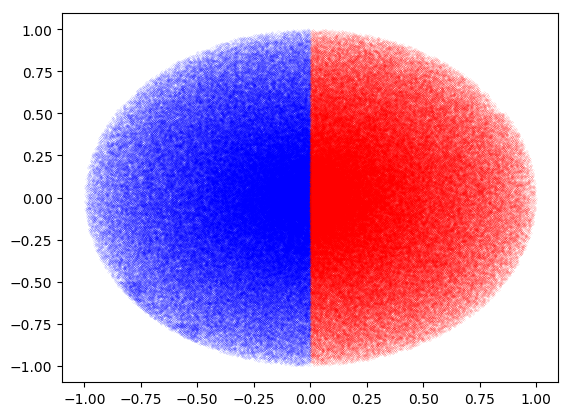

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7efb6ab0a828>

In [75]:
x1 = [p.x for p in t.trees[1].particles]
y1 = [p.z for p in t.trees[1].particles]
x2 = [p.x for p in t.trees[3].particles]
y2 = [p.z for p in t.trees[3].particles]
plot(x1,y1,"b.",ms=0.1)
plot(x2,y2,"r.",ms=0.1)

In [76]:
@time interact!(t, 0.3, ax, ay, az, 1.0e-3);

  0.327266 seconds (484.70 k allocations: 7.384 MB)


In [52]:
ts=Float64[]
for i in 1:12
    tic()
    interact!(t, 0.3, ax, ay, az, 1.0e-3);
    append!(ts, toq())
    @show i
end

i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12


In [53]:
mean(ts)

0.30301998166666666

In [77]:
@time collect!(t, ax,ay,az)

  0.812711 seconds (14.46 M allocations: 219.900 MB, 19.68% gc time)


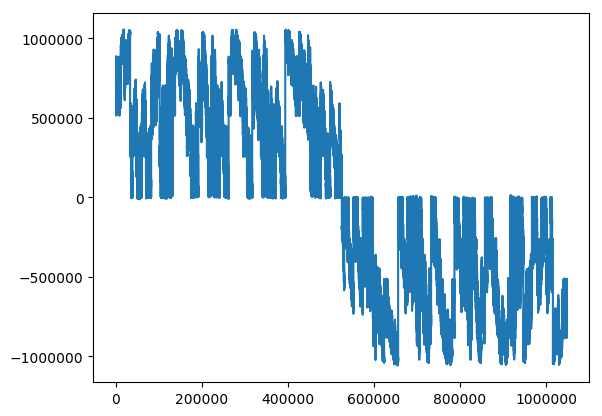

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7efb69e30390>

In [38]:
plot(ax)

In [39]:
mean(abs(ax))/1e5

5.1604745894999615

In [40]:
mx,myd,e50,e90,e95,e99,m,s = perf(particles, ax,ay,az, 10000, 1.0e-3)
print(myd)

mean(abs(rax)) = 514449.54073691263
[0.0,1.0,0.0,0.0,4.0,5.0,10.0,19.0,54.0,119.0,274.0,491.0,981.0,1552.0,1881.0,1836.0,1360.0,775.0,373.0,152.0,58.0,36.0,14.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

In [ ]:
myd = [0.0,0.0,0.0,1.0,2.0,5.0,9.0,20.0,57.0,109.0,252.0,556.0,975.0,1541.0,1922.0,1828.0,1294.0,758.0,401.0,138.0,76.0,35.0,15.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0]
my =  [0.0,0.0,0.0,0.0,1.0,0.0,6.0,3.0,10.0,21.0,39.0,90.0,220.0,421.0,777.0,1342.0,2269.0,3472.0,1262.0,58.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
semilogx(10.^mx,myd,"-k")
semilogx(10.^mx,my ,"-r")
#semilogx(10.^mx,myq ,"-g")

In [41]:
e50

0.5524111386472306

In [42]:
e90

1.1298675385450931

In [43]:
e99

2.3811120671178307

In [ ]:
mean(abs(ax))

In [ ]:
plot(ay)